In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)
df_train.head()

(60000, 785)
(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
"""Data Visualization"""
labels = {0: 'T-shirt/Top', 
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat', 
          5: 'Sandal',
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag',
          9: 'Ankle Boot'
         }
training = np.array(df_train, dtype='int')
testing = np.array(df_test, dtype='int')

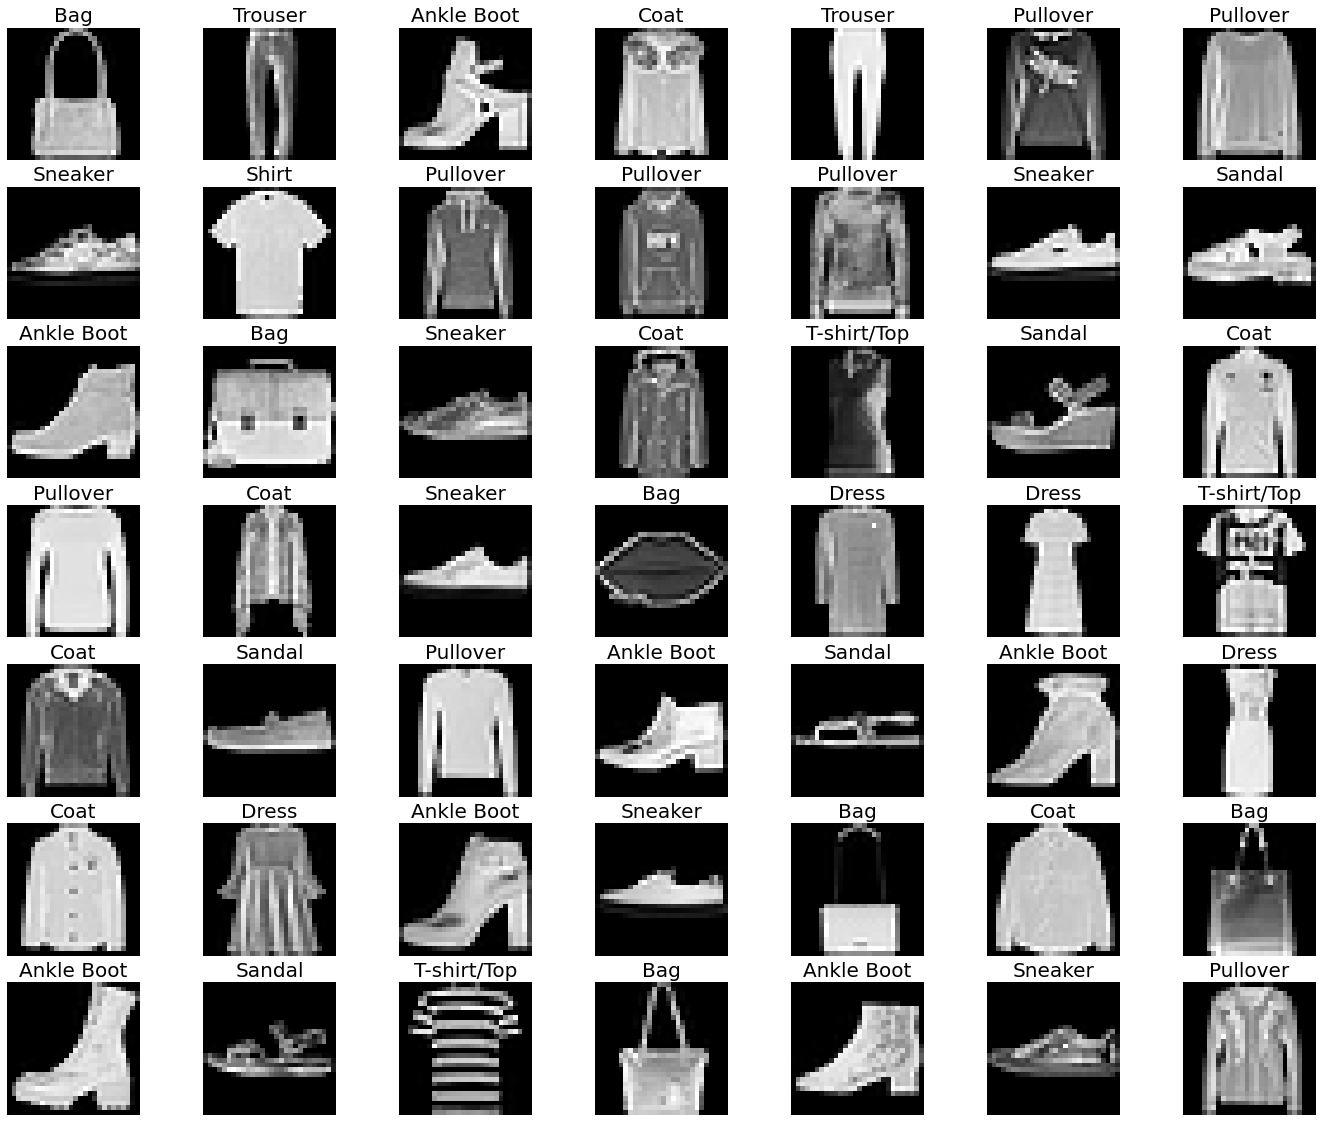

In [5]:
fig = plt.figure(figsize=(24,20))
for i in range(49):
    idx = random.randint(0, len(df_train))
    ax = fig.add_subplot(7,7,i+1)
    ax.imshow(training[idx, 1:].reshape(28, 28), cmap='gray')
    ax.set_title(labels[training[idx, 0]], fontsize=20)
    ax.axis('off')

In [8]:
"""Model Training"""
X_train = training[:, 1:]/255 # normalization
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [10]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28,28,1))

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [11]:
model_cnn = Sequential()

# Convolutiom
model_cnn.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn.add(Flatten())

# Dense layers
model_cnn.add(Dense(32, activation='relu')) # 32 corresponding to the 32 in convolution
model_cnn.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [12]:
model_cnn.fit(x=X_train, 
              y=y_train, 
              batch_size=512,
              epochs=50,
              verbose=1,
              validation_data=(X_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 45us/sample - loss: 1.4260 - accuracy: 0.5561 - val_loss: 0.8042 - val_accuracy: 0.7177
Epoch 2/50
48000/48000 [==============================] - 1s 31us/sample - loss: 0.7208 - accuracy: 0.7430 - val_loss: 0.6683 - val_accuracy: 0.7588
Epoch 3/50
48000/48000 [==============================] - 2s 32us/sample - loss: 0.6288 - accuracy: 0.7743 - val_loss: 0.5991 - val_accuracy: 0.7837
Epoch 4/50
48000/48000 [==============================] - 1s 31us/sample - loss: 0.5750 - accuracy: 0.7927 - val_loss: 0.5668 - val_accuracy: 0.7960
Epoch 5/50
48000/48000 [==============================] - 1s 30us/sample - loss: 0.5400 - accuracy: 0.8055 - val_loss: 0.5320 - val_accuracy: 0.8116
Epoch 6/50
48000/48000 [==============================] - 1s 31us/sample - loss: 0.5157 - accuracy: 0.8156 - val_loss: 0.5169 - val_accuracy: 0.8153
Epoch 7/50
48000/48000 [==============================] 

In [13]:
"""Model Evaluation"""
from sklearn.metrics import classification_report, confusion_matrix

evaluation = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))
evaluation #[loss, accuracy]

Test Accuracy: 0.867


[0.36496441383361816, 0.8671]

              precision    recall  f1-score   support

 T-shirt/Top       0.83      0.81      0.82      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.83      0.74      0.78      1000
       Dress       0.86      0.91      0.88      1000
        Coat       0.76      0.81      0.78      1000
      Sandal       0.98      0.93      0.95      1000
       Shirt       0.64      0.64      0.64      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.96      0.96      0.96      1000
  Ankle Boot       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



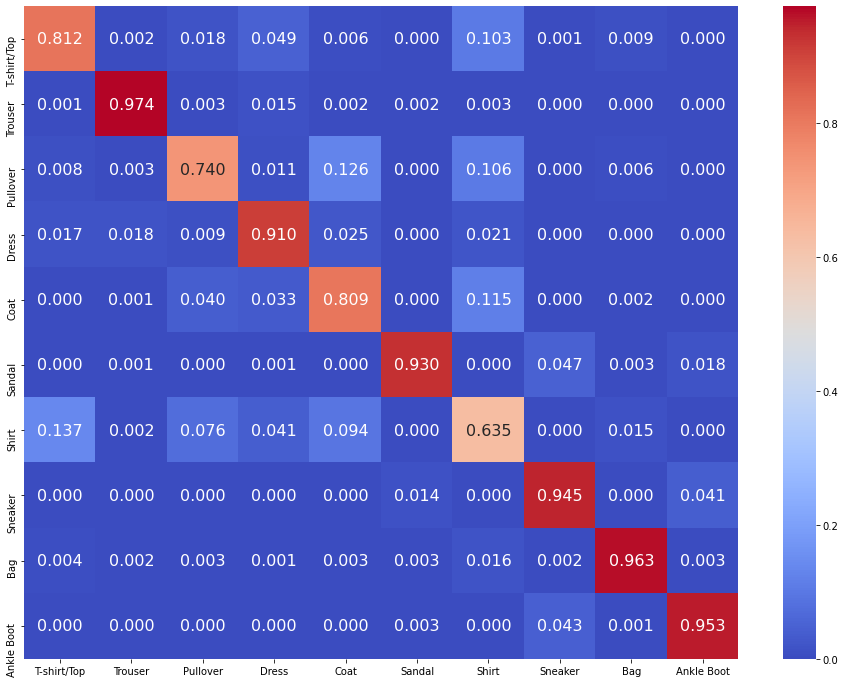

In [14]:
y_pred = model_cnn.predict_classes(X_test)
cm_cnn = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(16,12))
sns.heatmap(cm_cnn/1e3, annot=True, cmap='coolwarm',
            xticklabels=[labels[i] for i in range(10)], 
            yticklabels=[labels[i] for i in range(10)],
            fmt='.3f', annot_kws={'size':16})
print(classification_report(y_test, y_pred, target_names=[labels[i] for i in range(10)]))

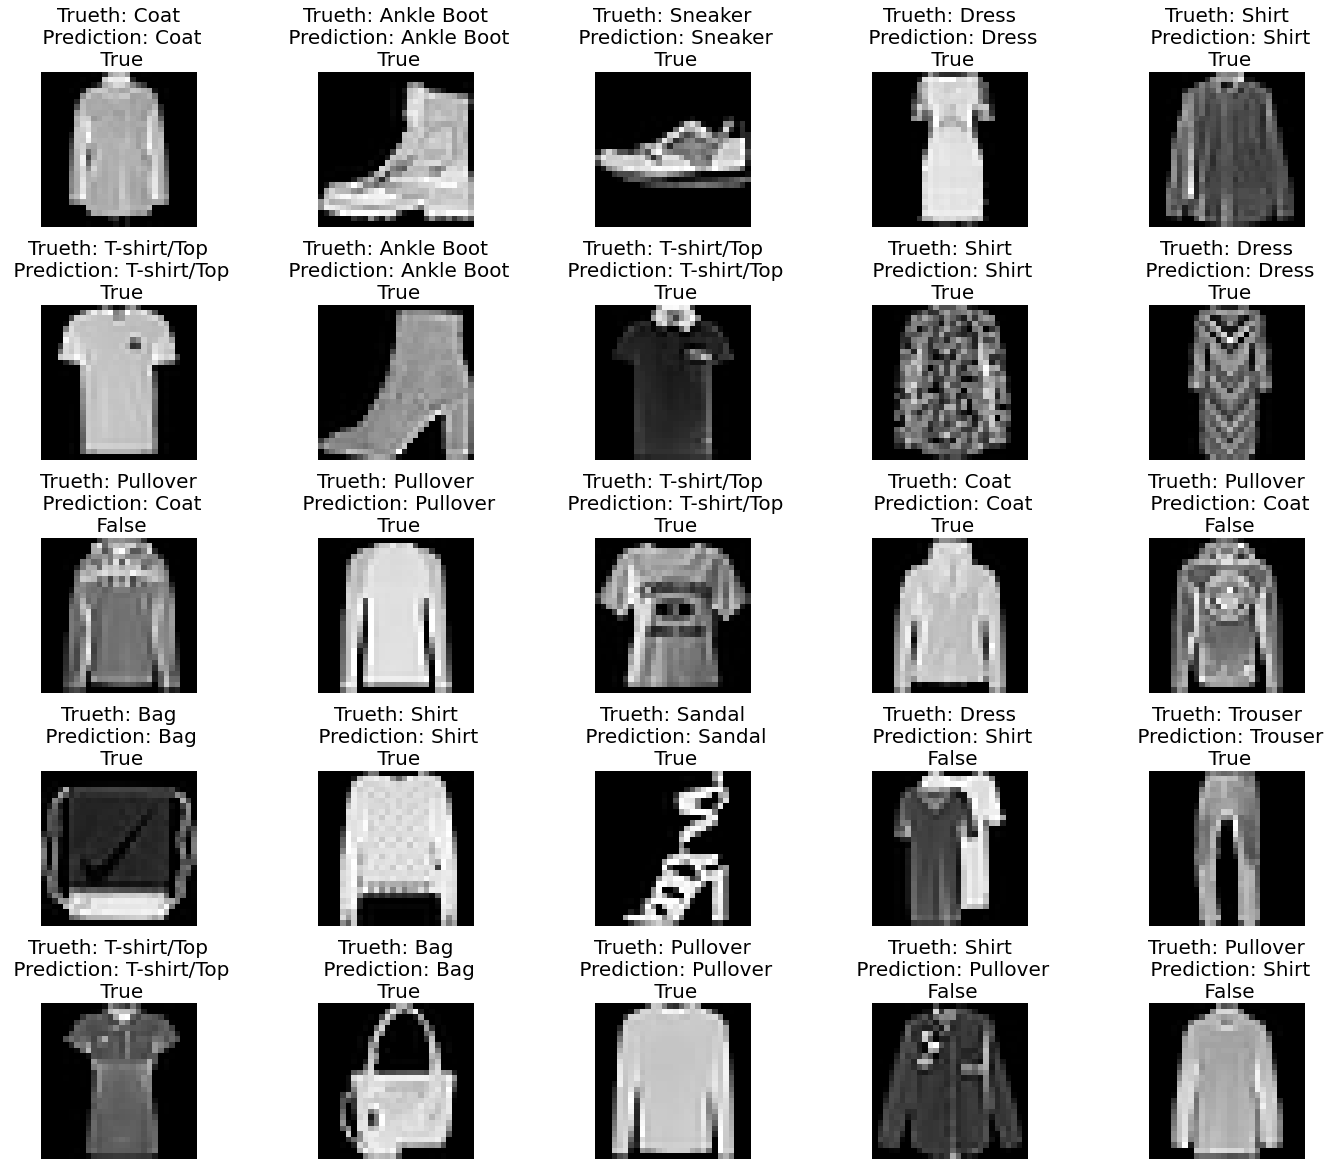

In [15]:
fig = plt.figure(figsize=(24,20))
for i in range(25):
    idx = random.randint(0, len(y_pred))
    ax = fig.add_subplot(5,5,i+1)
    ax.imshow(X_test[idx, :].reshape(28, 28), cmap='gray')
    ax.set_title('Trueth: {}\n Prediction: {}\n {}'.format(labels[y_test[idx]], labels[y_pred[idx]], 
                                                           labels[y_test[idx]]==labels[y_pred[idx]]),
                 fontsize=20)
    ax.axis('off')
plt.subplots_adjust(hspace=0.5)

<AxesSubplot:>

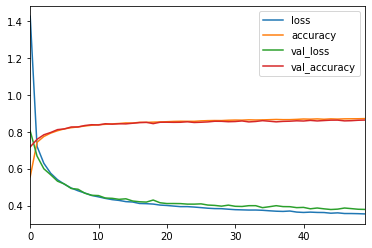

In [16]:
losses = pd.DataFrame(model_cnn.history.history)
losses.head()
losses.plot()

In [ ]:
"""Model improving"""
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_cnn2 = Sequential()

# Convolutiom
model_cnn2.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn2.add(Flatten())

# Dense layers
model_cnn2.add(Dense(32, activation='relu')) # 32 corresponding to the 32 in convolution
model_cnn2.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_cnn2.fit(x=X_train, 
              y=y_train, 
              batch_size=512,
              epochs=200,
              verbose=1,
              validation_data=(X_valid, y_valid),
              callbacks=[early_stop])

In [ ]:
losses2 = pd.DataFrame(model_cnn2.history.history)
losses2.plot()
evaluation2 = model_cnn2.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation2[1]))

In [ ]:
model_cnn3 = Sequential()

# Convolutiom
model_cnn3.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn3.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn3.add(Flatten())

# Dense layers
model_cnn3.add(Dense(64, activation='relu'))
model_cnn3.add(Dense(32, activation='relu'))
model_cnn3.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn3.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_cnn3.fit(x=X_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(X_valid, y_valid),
              callbacks=[early_stop])

In [ ]:
losses3 = pd.DataFrame(model_cnn3.history.history)
losses3.plot()
evaluation3 = model_cnn3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation3[1]))

In [ ]:
model_cnn4 = Sequential()

# Convolutiom
model_cnn4.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))

# Pooling
model_cnn4.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model_cnn4.add(Flatten())

# Dense layers
model_cnn4.add(Dense(64, activation='relu'))
model_cnn4.add(Dropout(0.5))

model_cnn4.add(Dense(32, activation='relu'))
model_cnn4.add(Dropout(0.5))

model_cnn4.add(Dense(10, activation='sigmoid')) # 10 corresponding to the 10 classes in classification

# compiling
# crossentropy when there are two or more label calsses
# spase_categorical_entropy when labels are provided as integers
# categorical_crossentropy when labes are provided using one-hot presentation
model_cnn4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model_cnn4.fit(x=X_train, 
              y=y_train, 
              batch_size=512,
              epochs=500,
              verbose=1,
              validation_data=(X_valid, y_valid),
              callbacks=[early_stop])

In [ ]:
losses4 = pd.DataFrame(model_cnn4.history.history)
losses4.plot()
evaluation4 = model_cnn4.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.3f}'.format(evaluation4[1]))